In [7]:
import sys
from sys import platform
if platform  == 'win32':
    sys.argv=["_", r"P:\rmahajan14\capstone_data\data", r"P:\rmahajan14\capstone_data\cache"]
if platform == 'linux' or platform == 'linux2':
    def full_path(p):
        return os.path.abspath(os.path.expanduser(p))
    sys.argv=["_", r"/mnt/d/DiDi_Ride_Data/data", r"/mnt/d/DiDi_Ride_Data/Ride_Data_Cache"]

In [8]:
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from loader1 import *
from utils import *
from common import *
from experiment2 import *
# from sys import platform

import warnings
warnings.filterwarnings('ignore')

In [10]:
import time

Basic Coding 

In [11]:
spatial_type = 'radial'

In [16]:
df_final_no_decay, target_df_no_decay = get_final_df_reg(use_cache=True, decay='No Decay', spatial_type=spatial_type)

/mnt/d/DiDi_Ride_Data/Ride_Data_Cache/merged_orders.msgpack exists
orders
Decay Calculation
No Decay
/mnt/d/DiDi_Ride_Data/Ride_Data_Cache/active_times.msgpack exists
Decay Calculation done in 15.944399356842041
1e
/mnt/d/DiDi_Ride_Data/Ride_Data_Cache/features_orders.msgpack exists
Features created in 3.4501793384552
1f
center is  410490.442183303 3392253.2150809667
checking bins name  r_radial 10
                           order_id ride_start_timestamp ride_stop_timestamp  \
0  00003ad9f837aca8ecdb9ae0729d0866  2016-11-01 14:35:44 2016-11-01 14:48:01   
1  0000c5bb7976b3dfe0fefa060265bdca  2016-11-01 15:06:22 2016-11-01 15:33:26   
2  0000f2c8aa21f2599a82923f317334bc  2016-11-01 19:38:49 2016-11-01 19:50:28   
3  000102a3f8b31b3bc888572108888727  2016-11-01 11:22:02 2016-11-01 11:50:06   
4  00017e395c1e449231b86f9149a793e5  2016-11-01 00:19:20 2016-11-01 00:34:41   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        104.107101        30.699385    

In [17]:
df_final_old_decay, target_df_old_decay = get_final_df_reg(use_cache=True, decay='Old Decay',spatial_type=spatial_type)

/mnt/d/DiDi_Ride_Data/Ride_Data_Cache/merged_orders.msgpack exists
orders
Decay Calculation
Old Decay
/mnt/d/DiDi_Ride_Data/Ride_Data_Cache/idle_times_old.msgpack exists
Decay Calculation done in 2.8947150707244873
1e
/mnt/d/DiDi_Ride_Data/Ride_Data_Cache/features_orders.msgpack exists
Features created in 3.6363205909729004
1f
/mnt/d/DiDi_Ride_Data/Ride_Data_Cache/radial_spatial_df.msgpack exists
spatial
Spatial Calculation done in 14.111906290054321


In [18]:
# Using the function create_modified_active_time_through_decay2 
# instead of create_modified_active_time_through_decay
df_final_new_decay1, target_df_new_decay1 = get_final_df_reg(use_cache=True, decay='New Decay', mult_factor=1, spatial_type=spatial_type)
df_final_new_decay10, target_df_new_decay10 = get_final_df_reg(use_cache=True, decay='New Decay', mult_factor=10, spatial_type=spatial_type)
df_final_new_decay100, target_df_new_decay100 = get_final_df_reg(use_cache=True, decay='New Decay', mult_factor=100, spatial_type=spatial_type)

/mnt/d/DiDi_Ride_Data/Ride_Data_Cache/merged_orders.msgpack exists
orders
Decay Calculation
New Decay
/mnt/d/DiDi_Ride_Data/Ride_Data_Cache/idle_times_new_1.msgpack exists
Decay Calculation done in 2.8573660850524902
1e
/mnt/d/DiDi_Ride_Data/Ride_Data_Cache/features_orders.msgpack exists
Features created in 3.2906129360198975
1f
/mnt/d/DiDi_Ride_Data/Ride_Data_Cache/radial_spatial_df.msgpack exists
spatial
Spatial Calculation done in 14.416457414627075
/mnt/d/DiDi_Ride_Data/Ride_Data_Cache/merged_orders.msgpack exists
orders
Decay Calculation
New Decay
/mnt/d/DiDi_Ride_Data/Ride_Data_Cache/idle_times_new_10.msgpack exists
Decay Calculation done in 3.005993127822876
1e
/mnt/d/DiDi_Ride_Data/Ride_Data_Cache/features_orders.msgpack exists
Features created in 3.164254903793335
1f
/mnt/d/DiDi_Ride_Data/Ride_Data_Cache/radial_spatial_df.msgpack exists
spatial
Spatial Calculation done in 15.87816572189331
/mnt/d/DiDi_Ride_Data/Ride_Data_Cache/merged_orders.msgpack exists
orders
Decay Calculat

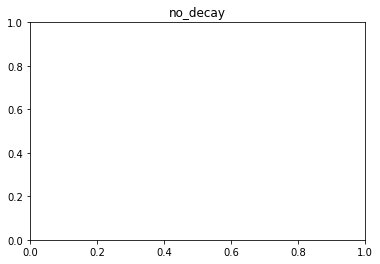

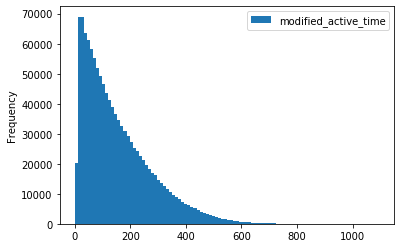

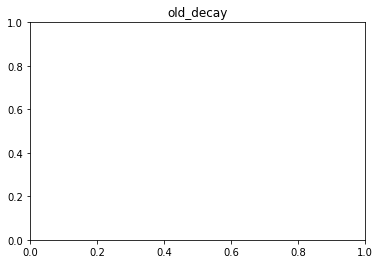

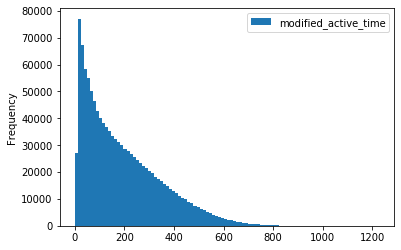

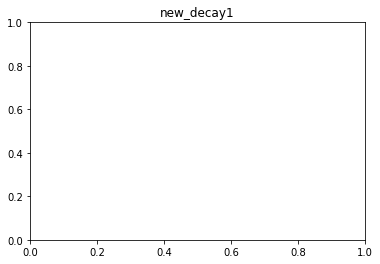

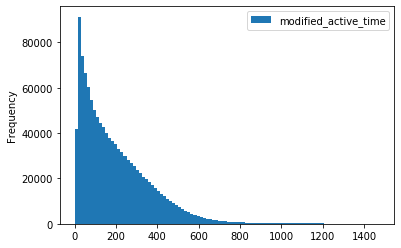

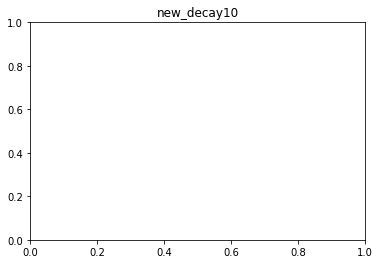

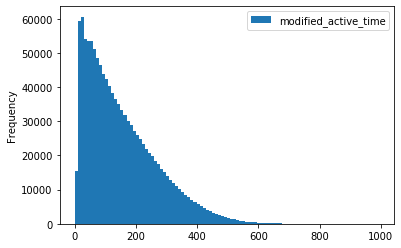

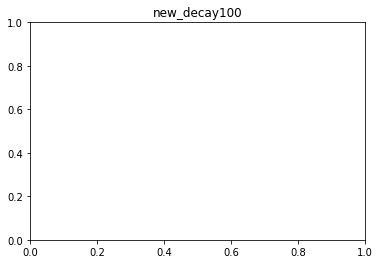

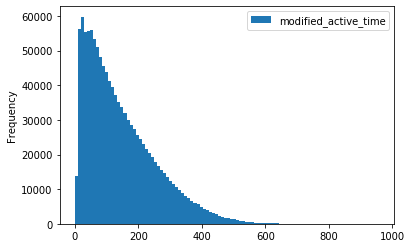

In [19]:
frames = [target_df_no_decay, target_df_old_decay, target_df_new_decay1, target_df_new_decay10, target_df_new_decay100]
name_list = ['no_decay', 'old_decay', 'new_decay1', 'new_decay10', 'new_decay100']
for df, title in zip(frames, name_list):
    plot_active_time_with_k(df, title)

In [20]:
target_df_new_decay1.modified_active_time.sort_values(ascending=False)

619801     1473.283333
3469       1467.116667
266015     1455.716667
103924     1452.066667
215002     1451.933333
              ...     
842756        0.050000
834910        0.050000
1160317       0.050000
429298        0.050000
380694        0.033333
Name: modified_active_time, Length: 1181102, dtype: float64

In [21]:
# 1164179    
# 585840     
# 780482
vals = [1164179, 585840, 780482]
target_df_new_decay1.iloc[vals]

,driver_id,ride_duration,modified_active_time,inactive_time,target
1164179,fc4f4a628eba0e67eb007269bf6f06da,105.116667,114.450000,0.0,0.918451
585840,7ecfe690831895e6efc099159acc4344,38.250000,44.933333,0.0,0.851261
780482,a921b07e19ebd27ef15c2797a0590d4b,61.683333,73.183333,0.0,0.842860


### Modelling Code 

We have till now coded the following models 

1. Linear Regression 
2. Linear Regression with L1 Regularization
3. Linear Regression with L2 Regularization
4. Random Forest Regressor 

Now we split the data in a ratio of 75:25

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [23]:
def build_model(df, target_df, name, seed=0):
    # regression forest
    print(f'building regression model for {name}')
    X = df    
    xtrain, xtest, ytrain, ytest = train_test_split(X, target_df['target'], random_state=seed)

    sc = StandardScaler()

    xtrain_sc = sc.fit_transform(xtrain)

    rr = RandomForestRegressor(random_state=seed)
    rr.fit(xtrain_sc, ytrain)

    xtest_sc = sc.transform(xtest)
    
    print(rr.score(xtest_sc, ytest))
    
    return rr.score(xtest_sc, ytest)

In [24]:
df_final_no_decay.shape, target_df_no_decay.shape

((1181102, 111), (1181102, 5))

In [25]:
df_list = [df_final_no_decay, df_final_old_decay, df_final_new_decay1, 
           df_final_new_decay10, df_final_new_decay100]
target_df_list = [target_df_no_decay, target_df_old_decay, target_df_new_decay1, 
                  target_df_new_decay10, target_df_new_decay100]
name_list = ['no_decay', 'old_decay', 'new_decay1', 'new_decay10', 'new_decay100']

In [26]:
result = {}
for df, target_df, name in zip(df_list, target_df_list, name_list):
    result[name] = build_model(df, target_df, name)

building regression model for no_decay
0.48716126342550553
building regression model for old_decay
0.676935416485434
building regression model for new_decay1
0.6675032953828274
building regression model for new_decay10
0.7509373228766197
building regression model for new_decay100
0.7918021738843363


In [27]:
result

{'no_decay': 0.48716126342550553,
 'old_decay': 0.676935416485434,
 'new_decay1': 0.6675032953828274,
 'new_decay10': 0.7509373228766197,
 'new_decay100': 0.7918021738843363}

In [28]:
df_final_old_decay.head()

,num_total_rides,num_pool_rides,% of pool rides,"(0 days 00:00:44.999999, 0 days 10:36:30]_count","(0 days 10:36:30, 0 days 14:43:06]_count","(0 days 14:43:06, 0 days 18:45:25]_count","(0 days 18:45:25, 0 days 23:59:59]_count","(0 days 00:00:44.999999, 0 days 10:36:30]_sum","(0 days 10:36:30, 0 days 14:43:06]_sum","(0 days 14:43:06, 0 days 18:45:25]_sum",...,"(9509.75, 78107.176](-38.414, -8.521]","(9509.75, 78107.176](-8.521, 14.323]","(9509.75, 78107.176](-99.688, -38.414]","(9509.75, 78107.176](111.762, 137.56]","(9509.75, 78107.176](137.56, 180.0]","(9509.75, 78107.176](14.323, 38.147]","(9509.75, 78107.176](38.147, 60.214]","(9509.75, 78107.176](60.214, 88.383]","(9509.75, 78107.176](88.383, 111.762]",inactive_time
driver_id,,,,,,,,,,,,,,,,,,,,,
0000131d486b69eb77ab6e9e7cca9f4c,3,0.0,0.000000,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
00002724a19c5f6a54ae8d60a378997e,1,0.0,0.000000,1,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
000042288ba964aa04d14869bd56efb6,5,0.0,0.000000,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.690378
000049d47b79747ad9927ba1bf5f4126,11,1.0,0.090909,0.363636,0.0909091,0.545455,0,0.347145,0.083383,0.569472,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243.061737
00005adc52a78e1630cfb50e4bd0f89e,4,0.0,0.000000,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [29]:
df_final_new_decay10.head()

,num_total_rides,num_pool_rides,% of pool rides,"(0 days 00:00:44.999999, 0 days 10:36:30]_count","(0 days 10:36:30, 0 days 14:43:06]_count","(0 days 14:43:06, 0 days 18:45:25]_count","(0 days 18:45:25, 0 days 23:59:59]_count","(0 days 00:00:44.999999, 0 days 10:36:30]_sum","(0 days 10:36:30, 0 days 14:43:06]_sum","(0 days 14:43:06, 0 days 18:45:25]_sum",...,"(9509.75, 78107.176](-38.414, -8.521]","(9509.75, 78107.176](-8.521, 14.323]","(9509.75, 78107.176](-99.688, -38.414]","(9509.75, 78107.176](111.762, 137.56]","(9509.75, 78107.176](137.56, 180.0]","(9509.75, 78107.176](14.323, 38.147]","(9509.75, 78107.176](38.147, 60.214]","(9509.75, 78107.176](60.214, 88.383]","(9509.75, 78107.176](88.383, 111.762]",inactive_time
driver_id,,,,,,,,,,,,,,,,,,,,,
0000131d486b69eb77ab6e9e7cca9f4c,3,0.0,0.000000,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.871019
00002724a19c5f6a54ae8d60a378997e,1,0.0,0.000000,1,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
000042288ba964aa04d14869bd56efb6,5,0.0,0.000000,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.475753
000049d47b79747ad9927ba1bf5f4126,11,1.0,0.090909,0.363636,0.0909091,0.545455,0,0.347145,0.083383,0.569472,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,333.463457
00005adc52a78e1630cfb50e4bd0f89e,4,0.0,0.000000,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.870189
